# Step 1

### **Step 2: Data Preparation and Exploration**

For this study, historical price data for a selection of financial assets is required, focusing on assets that often exhibit correlations or have price discrepancies. Suitable datasets include:
- Stock price data from sources such as Yahoo Finance, Alpha Vantage, or Kaggle.
- ETF price data.

**Procedure**:
- **Data Acquisition**: Historical data is scraped from reliable sources (e.g., Yahoo Finance).
- The dataset includes key variables: closing prices, volume, and timestamps.

In [2]:
import yfinance as yf
import pandas as pd
import logging

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Function to handle missing data
def handle_missing_data(df):
    return df.fillna(method='ffill').fillna(method='bfill')

# Define a function to collect historical data
def collect_stock_data(tickers, start_date, end_date, interval='1d'):
    """
    Collect historical stock data for given tickers.
    
    Args:
    - tickers (list): List of stock tickers (e.g., ['AAPL', 'MSFT'])
    - start_date (str): Start date for historical data (e.g., '2023-01-01')
    - end_date (str): End date for historical data (e.g., '2023-12-31')
    - interval (str): Data interval (e.g., '1d', '1wk', '1mo')
    
    Returns:
    - DataFrame: Combined stock data for all tickers
    """
    stock_data = {}
    for ticker in tickers:
        try:
            logging.info(f"Fetching data for {ticker}...")
            stock = yf.download(ticker, start=start_date, end=end_date, interval=interval)
            stock['Ticker'] = ticker
            stock_data[ticker] = handle_missing_data(stock)
        except Exception as e:
            logging.error(f"Failed to fetch data for {ticker}: {e}")
            continue

    combined_data = pd.concat(stock_data.values(), keys=stock_data.keys(), axis=0)
    combined_data.reset_index(inplace=True)
    combined_data['Date'] = pd.to_datetime(combined_data['Date'])
    
    return combined_data

# Define tickers and date range
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']
start_date = '2023-01-01'
end_date = '2023-12-31'

# Collect data
data = collect_stock_data(tickers, start_date, end_date)

# Log summary
if not data.empty:
    tickers_collected = data['Ticker'].nunique()
    logging.info(f"Successfully collected data for {tickers_collected} tickers.")

# Save data to Parquet for efficient storage
data.to_parquet('us_equities_data.parquet', index=False)

2024-10-18 20:23:02,677 - INFO - Fetching data for AAPL...
[*********************100%***********************]  1 of 1 completed
/var/folders/tv/nhnhr2s52p18zxtzwb3nqt440000gn/T/ipykernel_52553/935635255.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='ffill').fillna(method='bfill')
2024-10-18 20:23:03,061 - INFO - Fetching data for MSFT...
[*********************100%***********************]  1 of 1 completed
/var/folders/tv/nhnhr2s52p18zxtzwb3nqt440000gn/T/ipykernel_52553/935635255.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='ffill').fillna(method='bfill')
2024-10-18 20:23:03,207 - INFO - Fetching data for GOOGL...
[*********************100%***********************]  1 of 1 completed
/var/folders/tv/nhnhr2s52p18zxtzwb3nqt440000gn/T/ipykernel_5255

### **Step 3. Data Exploration and Preparation**
Exploration of the dataset is crucial to understanding asset relationships. Data exploration involves:
- **Univariate Analysis**: Examining the distribution of each asset’s prices over time (e.g., via histograms or line plots).
- **Bivariate Analysis**: Assessing relationships between different assets using scatter plots or correlation matrices.
- **Missing Value Treatment**: Addressing any missing values through interpolation or removal.

**Actions**:
- Data cleaning (handling missing values, normalization of prices).
- Generation of visualizations, including:
  - Line charts displaying price trends over time.
  - Heatmaps showing correlations between asset prices.

/var/folders/tv/nhnhr2s52p18zxtzwb3nqt440000gn/T/ipykernel_52553/887063709.py:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


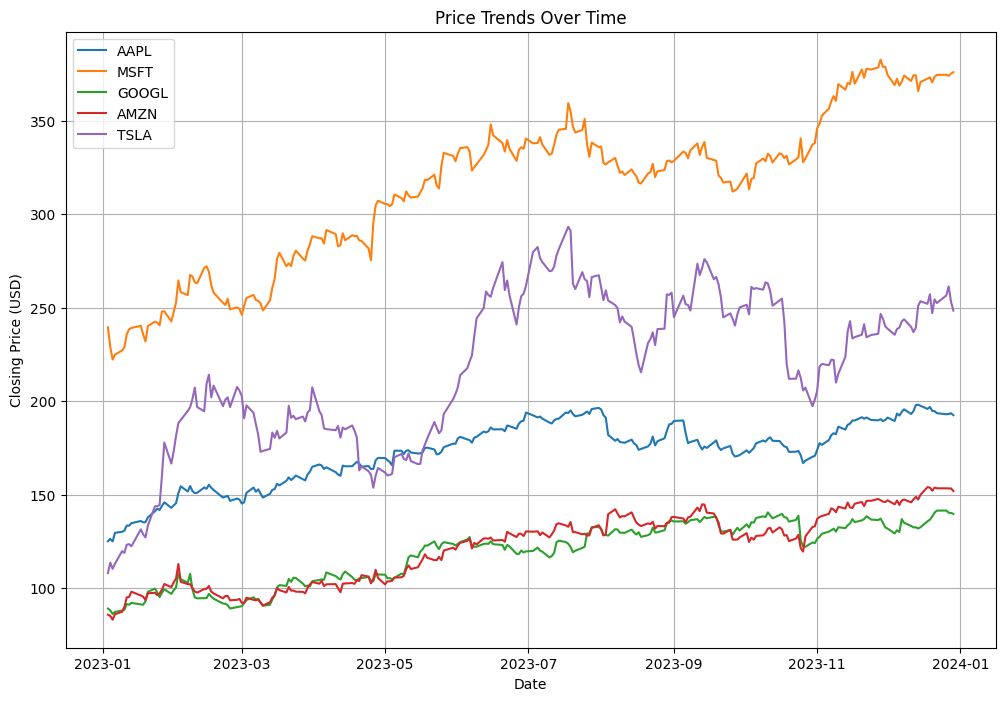

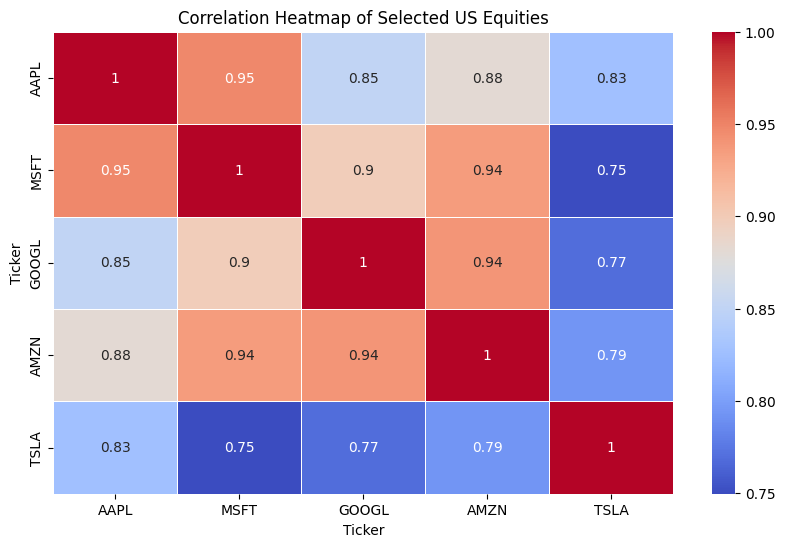

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the collected data (assuming it's saved as 'us_equities_data.csv')
data = pd.read_csv('us_equities_data.csv')

# Step 2.1: Data Cleaning - Handle Missing Values
def clean_data(data):
    """
    Clean the dataset by handling missing values.
    - Remove rows with missing dates
    - Use forward-fill method to handle missing price data
    """
    # Convert 'Date' column to datetime format
    data['Date'] = pd.to_datetime(data['Date'])
    
    # Sort by Date and Ticker for consistency
    data = data.sort_values(by=['Ticker', 'Date'])
    
    # Fill missing values using forward-fill method
    data = data.fillna(method='ffill')
    
    # Drop any remaining rows with missing values (if any)
    data = data.dropna()
    
    return data

# Clean the dataset
data = clean_data(data)

# Step 2.2: Univariate Analysis - Line Charts
def plot_line_chart(data, tickers):
    """
    Plot line charts showing the price trends of selected tickers over time.
    """
    plt.figure(figsize=(12, 8))
    
    for ticker in tickers:
        ticker_data = data[data['Ticker'] == ticker]
        plt.plot(ticker_data['Date'], ticker_data['Close'], label=ticker)
    
    plt.title('Price Trends Over Time')
    plt.xlabel('Date')
    plt.ylabel('Closing Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Univariate Analysis - Plot Line Charts
selected_tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']
plot_line_chart(data, selected_tickers)

# Step 2.3: Bivariate Analysis - Correlation Heatmap
def plot_correlation_heatmap(data, tickers):
    """
    Generate a heatmap showing the correlations between selected assets.
    """
    # Create a pivot table with Date as index and Ticker as columns
    pivot_data = data.pivot_table(index='Date', columns='Ticker', values='Close')
    
    # Select the tickers of interest
    selected_data = pivot_data[tickers]
    
    # Calculate the correlation matrix
    correlation_matrix = selected_data.corr()
    
    # Plot the heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Heatmap of Selected US Equities')
    plt.show()

# Bivariate Analysis - Plot Correlation Heatmap
plot_correlation_heatmap(data, selected_tickers)


### **4. Analysis and Modeling Techniques**
#### **Methodological Approach**

To achieve the study’s objective, two primary statistical approaches are employed:

1. **Mean Reversion Model**:
   - Hypothesis: Asset prices exhibit a tendency to revert to their historical mean over time.
   - Methodology: Rolling means or z-scores are calculated to identify instances where a stock/ETF deviates significantly from its mean, signaling a potential trade.

2. **Cointegration Test**:
   - Hypothesis: Certain pairs of assets move together over the long term.
   - Methodology: Cointegration testing is used to identify pairs of assets whose prices are statistically correlated, even if they diverge over shorter periods.

**Implementation**:
- Application of the **mean reversion** technique to calculate z-scores and identify trade signals based on price deviations.
- Use of **cointegration tests** to identify pairs of assets with long-term statistical relationships, utilizing Python libraries such as `statsmodels`.

### 4.1 Mean Reversion Analysis

The mean reversion approach relies on the concept that prices fluctuate around a historical mean and tend to revert to this mean over time. We will use z-scores to determine how far a price is from its mean and generate signals based on deviations.

#### Interpretation

- **Z-Score Calculation**: The z-score indicates how many standard deviations the current price is away from the rolling mean.
- **Trade Signals**:
    - **Buy Signal**: When the z-score is below `-2` (the price is significantly below its mean), it suggests the asset is undervalued.
    - **Sell Signal**: When the z-score is above `+2` (the price is significantly above its mean), it suggests the asset is overvalued.

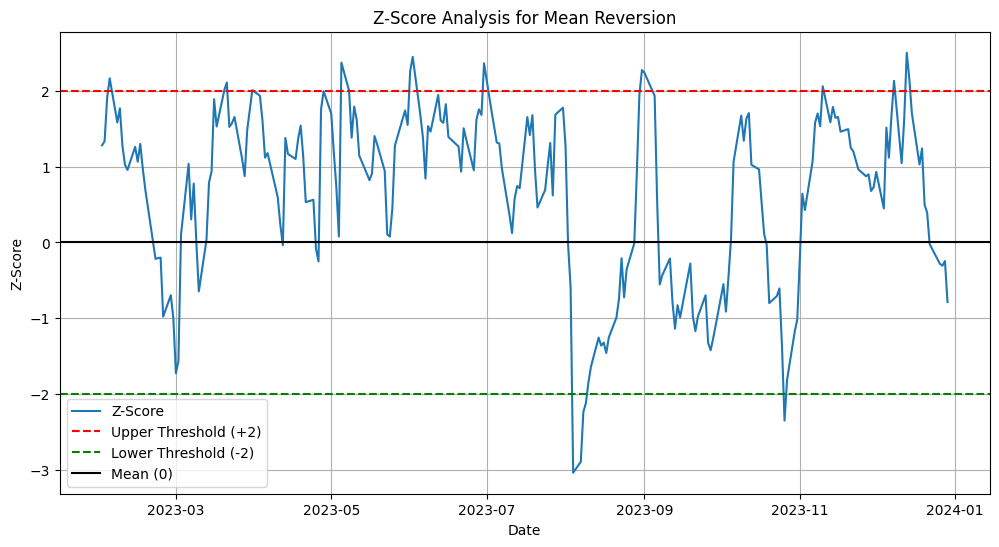

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Calculate rolling mean and z-score
def calculate_z_scores(data, ticker, window=20):
    """
    Calculate rolling mean, standard deviation, and z-scores for a given asset.
    
    Args:
    - data (DataFrame): Historical stock data
    - ticker (str): Stock ticker
    - window (int): Window size for rolling calculations
    
    Returns:
    - DataFrame: Original data with added columns for rolling mean, std, and z-score
    """
    ticker_data = data[data['Ticker'] == ticker].copy()
    ticker_data['Rolling_Mean'] = ticker_data['Close'].rolling(window=window).mean()
    ticker_data['Rolling_Std'] = ticker_data['Close'].rolling(window=window).std()
    ticker_data['Z_Score'] = (ticker_data['Close'] - ticker_data['Rolling_Mean']) / ticker_data['Rolling_Std']
    
    return ticker_data

# Example: Calculate z-scores for Apple
apple_data = calculate_z_scores(data, 'AAPL', window=20)

# Plot z-scores to identify trade signals
def plot_z_scores(ticker_data):
    """
    Plot the z-scores to visualize potential trade signals.
    """
    plt.figure(figsize=(12, 6))
    plt.plot(ticker_data['Date'], ticker_data['Z_Score'], label='Z-Score')
    plt.axhline(2, color='red', linestyle='--', label='Upper Threshold (+2)')
    plt.axhline(-2, color='green', linestyle='--', label='Lower Threshold (-2)')
    plt.axhline(0, color='black', linestyle='-', label='Mean (0)')
    plt.title('Z-Score Analysis for Mean Reversion')
    plt.xlabel('Date')
    plt.ylabel('Z-Score')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_z_scores(apple_data)


### 4.2 Cointegration Analysis

Cointegration is used to identify pairs of assets that have a long-term statistical relationship. Even if their prices diverge in the short term, they will tend to move together over a longer period. We will use the Engle-Granger two-step method to test for cointegration.

#### Interpretation
- **Cointegration Hypothesis**: If the p-value from the test is less than `0.05`, we reject the null hypothesis that the pair is not cointegrated. This suggests the pair has a long-term relationship and could be traded using a statistical arbitrage strategy.
- **Strategy**: For cointegrated pairs, when the spread between their prices widens, the strategy would be to short the overperforming asset and buy the underperforming one, expecting the spread to converge.

In [18]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import coint

def test_cointegration(data, ticker1, ticker2):
    """
    Visualize the price series and spread for two potentially cointegrated assets.
    Also, display the result of the cointegration test and its inference.
    
    Args:
    - data (DataFrame): Historical stock data
    - ticker1 (str): First stock ticker
    - ticker2 (str): Second stock ticker
    """
    # Filter data for each ticker
    data1 = data[data['Ticker'] == ticker1].set_index('Date')['Close']
    data2 = data[data['Ticker'] == ticker2].set_index('Date')['Close']
    
    # Ensure both series have the same dates
    combined = pd.concat([data1, data2], axis=1).dropna()
    data1_aligned, data2_aligned = combined.iloc[:, 0], combined.iloc[:, 1]
    
    # Perform cointegration test
    score, p_value, _ = coint(data1_aligned, data2_aligned)
    
    # Display cointegration test result
    print(f"Cointegration Test between {ticker1} and {ticker2}: p-value = {p_value}")
    if p_value < 0.05:
        print(f"The pair is likely cointegrated (p < 0.05), suitable for trading.")
        inference_text = f"The pair {ticker1} and {ticker2} is likely cointegrated (p < 0.05), suitable for trading."
    else:
        print(f"The pair is not cointegrated (p >= 0.05), not suitable for trading.")
        inference_text = f"The pair {ticker1} and {ticker2} is not cointegrated (p >= 0.05), not suitable for trading."
    
    # Plot the price series
    plt.figure(figsize=(12, 6))
    plt.plot(data1_aligned.index, data1_aligned, label=ticker1)
    plt.plot(data2_aligned.index, data2_aligned, label=ticker2)
    plt.title(f"Price Series: {ticker1} and {ticker2}")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Calculate the spread
    spread = data1_aligned - data2_aligned
    
    # Plot the spread and mean-reversion behavior
    plt.figure(figsize=(12, 6))
    plt.plot(spread.index, spread, label="Spread", color='purple')
    plt.axhline(spread.mean(), color='red', linestyle='--', label="Mean")
    plt.axhline(spread.mean() + spread.std(), color='green', linestyle='--', label="Mean + 1 Std Dev")
    plt.axhline(spread.mean() - spread.std(), color='green', linestyle='--', label="Mean - 1 Std Dev")
    plt.title(f"Spread Between {ticker1} and {ticker2}")
    plt.xlabel("Date")
    plt.ylabel("Spread (Price Difference)")
    plt.legend()
    plt.grid(True)
    
    # Add the cointegration result as a text box on the spread plot
    plt.figtext(0.5, -0.1, f"Cointegration Test p-value = {p_value:.5f}\n{inference_text}",
                ha="center", fontsize=10, bbox={"facecolor":"lightgray", "alpha":0.5, "pad":5})
    
    plt.show()

##### Example 1: MSFT and AAPL

Cointegration Test between AAPL and MSFT: p-value = 0.04165340085225047
The pair is likely cointegrated (p < 0.05), suitable for trading.


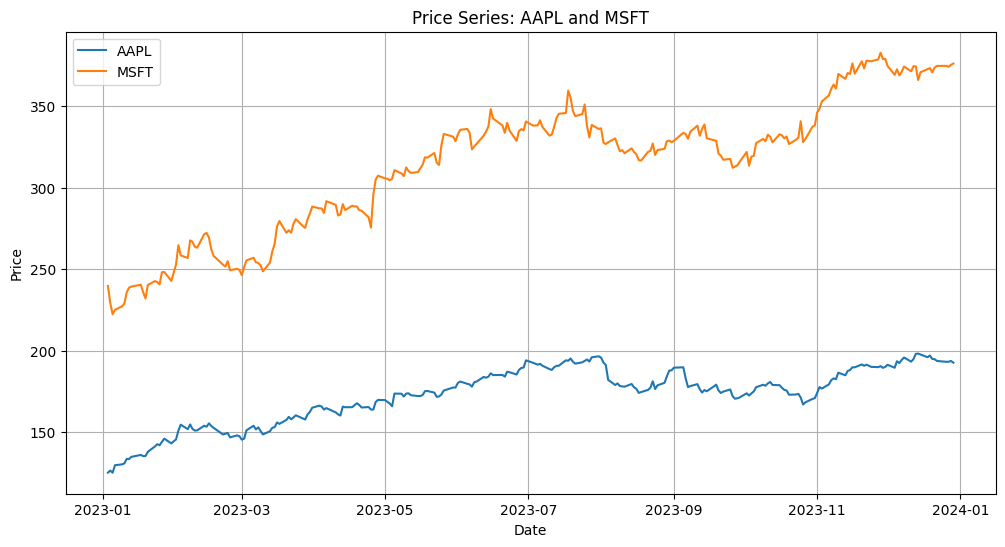

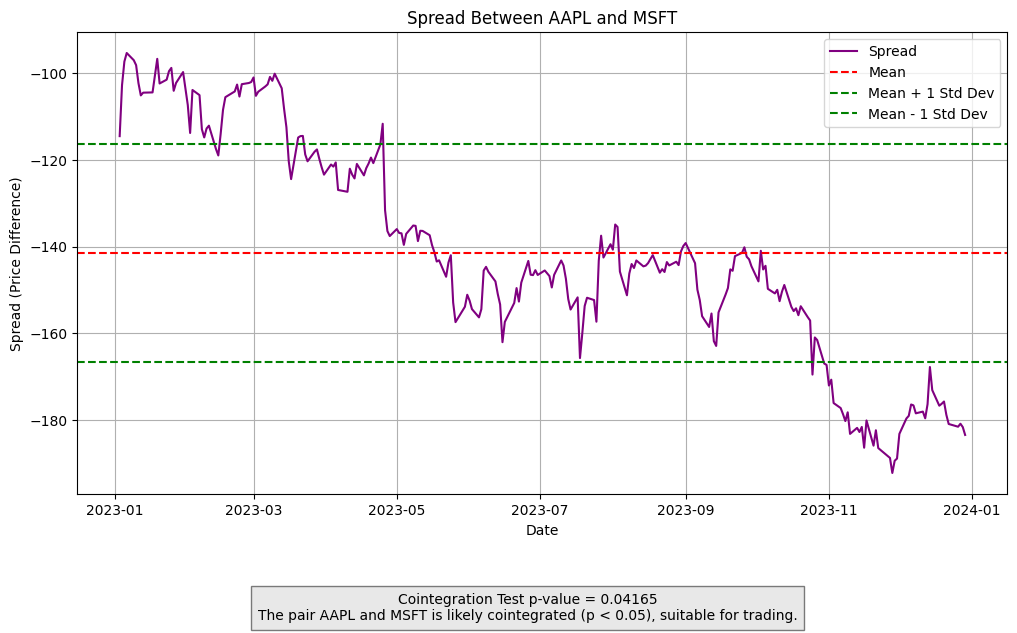

In [19]:
test_cointegration(data, 'AAPL', 'MSFT')

##### Example 2: GOOGL and TSLA

Cointegration Test between GOOGL and TSLA: p-value = 0.6494353211029466
The pair is not cointegrated (p >= 0.05), not suitable for trading.


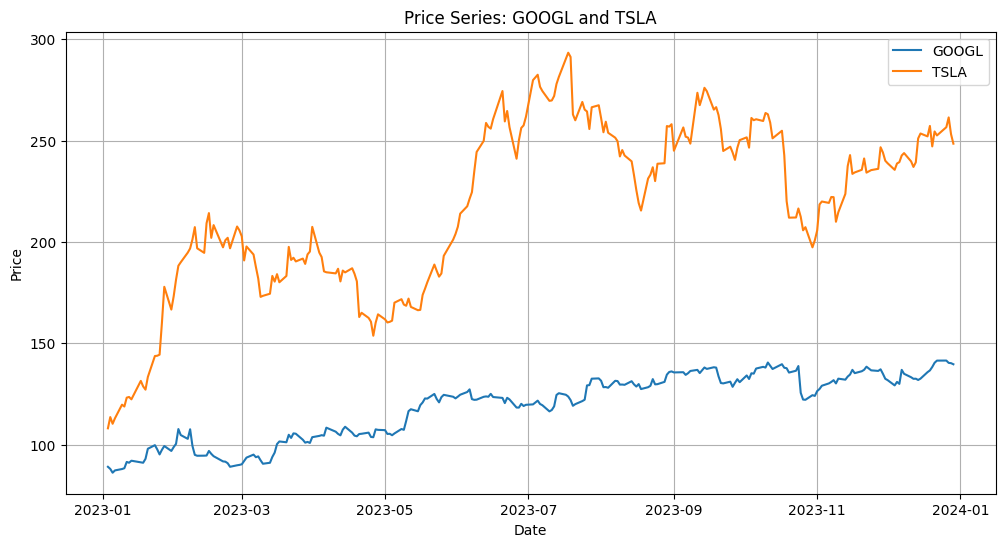

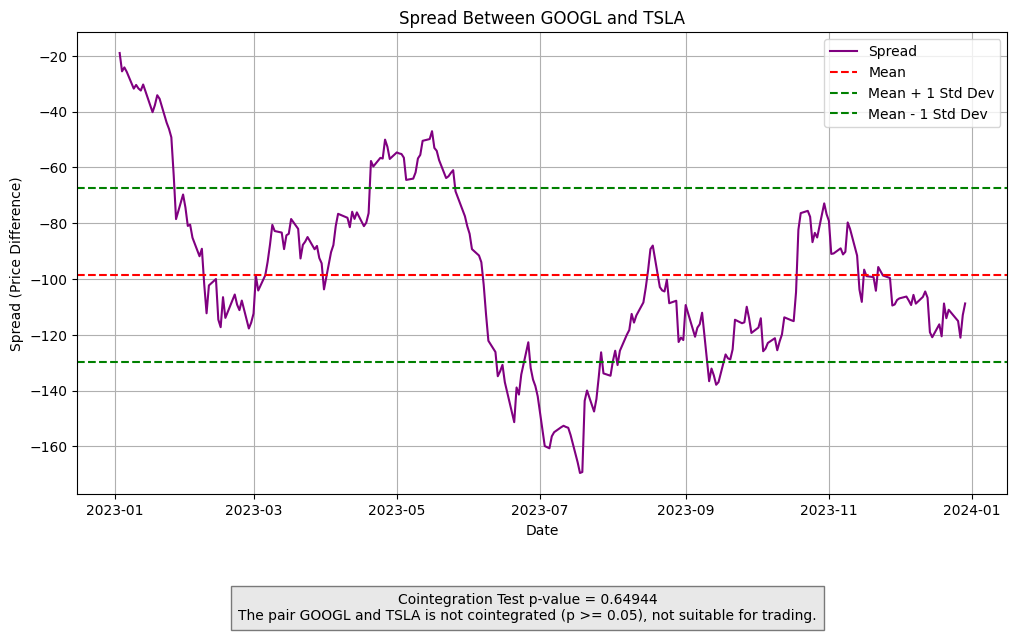

In [20]:
test_cointegration(data, 'GOOGL', 'TSLA')

### **Step 5: Create a Model and Improve**
In place of simple linear regression, we use **non-parametric methods** and **deep learning** models like **Convolutional Neural Networks (CNNs)** and **Transformers**. These models can capture complex dependencies and interactions in the data. Additionally, **Ornstein-Uhlenbeck** models can be applied for mean reversion.

**Action**: 
- Start with a baseline **Ornstein-Uhlenbeck** model for mean reversion, then improve it using **deep learning** techniques (CNNs or RNNs).
- Incorporate **Reinforcement Learning** (e.g., A3C or A2C) for decision-making based on learned signals.

### 5.1: Ornstein-Uhlenbeck (OU) Model for Mean Reversion

The Ornstein-Uhlenbeck process is a stochastic differential equation often used to model mean-reverting behavior in asset prices.

#### Interpretation
The Ornstein-Uhlenbeck model captures mean reversion by pulling the asset price back to its long-term mean. In practice, this can be used to generate buy and sell signals when the asset deviates significantly from its mean.

In [29]:
from arch.univariate import ConstantMean, GARCH
from arch import arch_model
import numpy as np

def generate_ou_process(data, ticker1, ticker2):
    """
    Fit an Ornstein-Uhlenbeck process to the actual spread between two assets
    and plot the actual vs. simulated OU process.
    
    Args:
    - data (DataFrame): Historical stock data
    - ticker1 (str): First stock ticker
    - ticker2 (str): Second stock ticker
    """
    # Filter data for each ticker and calculate the spread
    data1 = data[data['Ticker'] == ticker1].set_index('Date')['Close']
    data2 = data[data['Ticker'] == ticker2].set_index('Date')['Close']
    combined = pd.concat([data1, data2], axis=1).dropna()
    data1_aligned, data2_aligned = combined.iloc[:, 0], combined.iloc[:, 1]
    
    # Calculate the spread
    spread = data1_aligned - data2_aligned


    def estimate_ou_parameters(spread):
        """
        Fit Ornstein-Uhlenbeck parameters using the arch package.
        
        Args:
        - spread (np.array): Time series of the spread between two assets.
        
        Returns:
        - theta, mu, sigma: Estimated parameters of the OU process.
        """
        # Convert spread to a time series suitable for `arch`
        model = ConstantMean(spread)
        model.volatility = GARCH(1, 0, 1)  # Define a GARCH(1,1) model for volatility
        model_fit = model.fit(disp="off")
        
        # Extract the necessary parameters
        mu = model_fit.params['mu']
        sigma = np.sqrt(model_fit.conditional_volatility.mean())
        
        # Use a simple method to estimate `theta` as mean reversion speed
        residuals = spread - mu
        autocov = np.cov(residuals[:-1], residuals[1:])[0][1]
        var = np.var(residuals)
        theta = -np.log(autocov / var)
        
        return theta, mu, sigma


    # Estimate OU parameters from the actual spread
    theta, mu, sigma = estimate_ou_parameters(spread.values)
    
    # Generate an OU process based on estimated parameters
    T = len(spread)
    dt = 1  # assuming daily data
    x0 = spread.values[0]
    
    ou_simulated = np.zeros(T)
    ou_simulated[0] = x0
    for t in range(1, T):
        dx = theta * (mu - ou_simulated[t-1]) * dt + sigma * np.sqrt(dt) * np.random.randn()
        ou_simulated[t] = ou_simulated[t-1] + dx

    # Plot the actual spread vs. the simulated OU process
    plt.figure(figsize=(12, 6))
    plt.plot(spread.index, spread.values, label="Actual Spread", color='blue')
    plt.plot(spread.index, ou_simulated, label="Simulated OU Process", color='orange', linestyle='--')
    plt.title(f"Ornstein-Uhlenbeck Process: Actual vs. Simulated Spread ({ticker1} - {ticker2})")
    plt.xlabel("Date")
    plt.ylabel("Spread (Price Difference)")
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Display the estimated parameters
    print(f"Estimated OU Parameters for {ticker1} - {ticker2} Spread:")
    print(f"Theta (Speed of Reversion): {theta:.4f}")
    print(f"Mu (Long-term Mean): {mu:.4f}")
    print(f"Sigma (Volatility): {sigma:.4f}")


##### Example 1: AAPL and MSFT

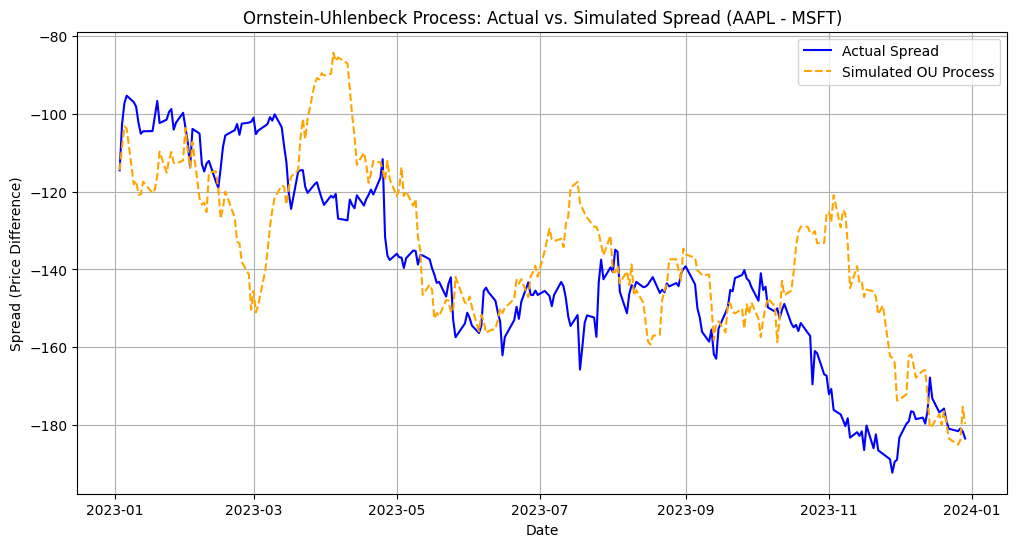

Estimated OU Parameters for AAPL - MSFT Spread:
Theta (Speed of Reversion): 0.0130
Mu (Long-term Mean): -145.1027
Sigma (Volatility): 4.5043


In [30]:
# Example: Fit and plot OU process for the spread between AAPL and MSFT
generate_ou_process(data, 'AAPL', 'MSFT')

### 5.2: Deep Learning Models
Next, we aim to capture more complex patterns by using **Convolutional Neural Networks (CNNs)** and **Recurrent Neural Networks (RNNs)**, particularly **Long Short-Term Memory (LSTM) networks**. These models are adept at extracting patterns in temporal data and handling sequences, making them suitable for financial time series analysis.

Here, the goal is to calculate the spread between two stocks (e.g., AAPL and MSFT) and use this spread as the input data for the model. 

#### 5.2.1: Data Preparation for Deep Learning
Before building any models, the data needs to be prepared. This includes normalizing the data and creating sequences that can be fed into the neural networks.

In [61]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

def load_and_prepare_data(data_path, ticker1, ticker2):
    """
    Load data from a Parquet file and prepare the spread between two tickers.
    
    Args:
    - data_path (str): Path to the Parquet file containing stock data
    - ticker1 (str): First stock ticker
    - ticker2 (str): Second stock ticker
    
    Returns:
    - np.array: Sequences of normalized spread values
    - np.array: Labels for the sequences
    - MinMaxScaler: Scaler used for normalization
    """
    # Load the data from Parquet
    data = pd.read_parquet(data_path)
    
    # Filter data for each ticker
    ticker1_data = data[data['Ticker'] == ticker1].set_index('Date')['Close']
    ticker2_data = data[data['Ticker'] == ticker2].set_index('Date')['Close']
    
    # Ensure both series have the same dates
    combined = pd.concat([ticker1_data, ticker2_data], axis=1).dropna()
    spread = combined.iloc[:, 0] - combined.iloc[:, 1]  # Calculate the spread: ticker1 - ticker2
    
    # Normalize the spread values
    scaler = MinMaxScaler(feature_range=(0, 1))
    spread_normalized = scaler.fit_transform(spread.values.reshape(-1, 1))
    
    # Create sequences from the normalized spread data
    X, y = create_sequences(spread_normalized)
    
    return X, y, scaler

def create_sequences(data, sequence_length=50):
    """
    Create sequences of data for LSTM training.
    
    Args:
    - data (np.array): Normalized time series data
    - sequence_length (int): Length of the input sequence
    
    Returns:
    - np.array: Input sequences
    - np.array: Corresponding labels
    """
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length])
        labels.append(data[i + sequence_length])
    return np.array(sequences), np.array(labels)

def split_data(X, y, test_size=0.2):
    """
    Split the data into training and testing sets.
    
    Args:
    - X (np.array): Input sequences
    - y (np.array): Corresponding labels
    - test_size (float): Proportion of the dataset to include in the test split
    
    Returns:
    - np.array: Training input sequences
    - np.array: Testing input sequences
    - np.array: Training labels
    - np.array: Testing labels
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)
    
    # Reshape data for LSTM input: (samples, time steps, features)
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
    
    return X_train, X_test, y_train, y_test


# Load and prepare data for LSTM training
X, y, scaler = load_and_prepare_data('us_equities_data.parquet', 'AAPL', 'MSFT')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = split_data(X, y)

#### 5.2.2: Build and Train the LSTM Model

In [63]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

def build_lstm_model(input_shape):
    """
    Build an LSTM model for time series prediction.
    
    Args:
    - input_shape (tuple): Shape of the input data (time steps, features)
    
    Returns:
    - Sequential: Compiled LSTM model
    """
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        LSTM(50),
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

def train_model(X_train, y_train, input_shape, epochs=20, batch_size=32, validation_split=0.1):
    """
    Train the LSTM model on the training data.
    
    Args:
    - X_train (np.array): Training input sequences
    - y_train (np.array): Training labels
    - input_shape (tuple): Shape of the input data
    - epochs (int): Number of epochs to train the model
    - batch_size (int): Batch size for training
    - validation_split (float): Proportion of the training data to use for validation
    
    Returns:
    - Sequential: Trained LSTM model
    """
    model = build_lstm_model(input_shape)
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=validation_split)
    return model


# Train the model
input_shape = (X_train.shape[1], X_train.shape[2])
lstm_model = train_model(X_train, y_train, input_shape)

Epoch 1/20


/Users/user/Desktop/current/Project Arbo/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.2812 - val_loss: 0.0069
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0256 - val_loss: 0.0583
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0309 - val_loss: 0.0082
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0117 - val_loss: 0.0028
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0192 - val_loss: 0.0054
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0101 - val_loss: 0.0166
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0132 - val_loss: 0.0179
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0097 - val_loss: 0.0103
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0075 - val_loss: 0.0068
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0086 - val_loss: 0.0084
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0089 - val_loss: 0.0124
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0075 - val_loss: 0.0123
Epoch 13/20


##### Visualization

Here is a brief visualization of the CNN we've trained

In [56]:
%%capture

import graphviz
def render_lstm_graph(file_path):
    """
    Render and display an LSTM structure graph using Graphviz.
    
    Args:
    - file_path (str): Path to the Graphviz LSTM structure file.
    """
    # Read the LSTM structure from the file
    with open(file_path, 'r') as f:
        lstm_structure = f.read()
    
    # Create a Graphviz source object
    graph = graphviz.Source(lstm_structure)
    
    # Render the graph and display it
    graph.render(filename='assets/lstm_structure_output', format='png', cleanup=True)
    # graph.view()

# Example usage:
render_lstm_graph('assets/lstm_structure')

![](../assets/lstm_structure_output.png)

### **Step 6: Performance Evaluation and Visualization**
We evaluate the performance of our model using metrics like Sharpe Ratio and MSE.

- **Mean Squared Error (MSE)**: Measures the average squared difference between the predicted and actual values. Lower MSE indicates better prediction accuracy.

- **Sharpe Ratio**: Measures the **risk-adjusted** return. It is calculated as the ratio of the average return to the standard deviation of returns. Higher Sharpe Ratios indicate better risk-adjusted performance.

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


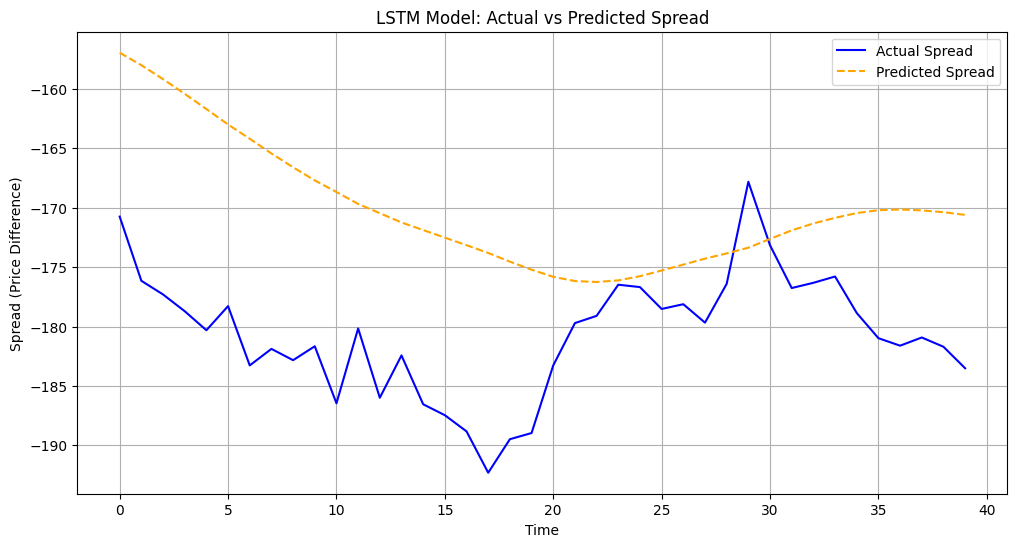

Mean Squared Error: 151.2359
Sharpe Ratio: 0.5319


In [76]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

def evaluate_model_with_metrics(model, X_test, y_test, scaler):
    """
    Evaluate the LSTM model with advanced metrics and plot predictions vs actual values.
    
    Args:
    - model (Sequential): Trained LSTM model
    - X_test (np.array): Testing input sequences
    - y_test (np.array): Testing labels
    - scaler (MinMaxScaler): Scaler used for normalization
    
    Returns:
    - dict: Dictionary of evaluation metrics including MSE, Sharpe Ratio, and Maximum Drawdown
    """
    # Make predictions on the test set
    predicted = model.predict(X_test)
    
    # Rescale predictions back to original scale
    predicted_rescaled = scaler.inverse_transform(predicted)
    y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))
    
    # Calculate Mean Squared Error (MSE)
    mse = tf.keras.losses.MeanSquaredError()
    mse_value = mse(y_test_rescaled, predicted_rescaled).numpy()

    # Calculate daily returns from the predicted spread changes
    predicted_returns = np.diff(predicted_rescaled.flatten()) / predicted_rescaled[:-1].flatten()
    
    # Calculate Sharpe Ratio
    avg_return = np.mean(predicted_returns)
    std_dev_return = np.std(predicted_returns)
    sharpe_ratio = avg_return / std_dev_return if std_dev_return != 0 else 0
    
    # Plot the actual vs. predicted spread
    plt.figure(figsize=(12, 6))
    plt.plot(y_test_rescaled, color='blue', label='Actual Spread')
    plt.plot(predicted_rescaled, color='orange', linestyle='--', label='Predicted Spread')
    plt.title('LSTM Model: Actual vs Predicted Spread')
    plt.xlabel('Time')
    plt.ylabel('Spread (Price Difference)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print and return metrics
    print(f'Mean Squared Error: {mse_value:.4f}')
    print(f'Sharpe Ratio: {sharpe_ratio:.4f}')

    return {
        "MSE": mse_value,
        "Sharpe Ratio": sharpe_ratio,
    }

metrics = evaluate_model_with_metrics(lstm_model, X_test, y_test, scaler)

### **Step 7: Application**

Now we apply this model to the real world to see what it predicts, where it tells us to buy or sell a certain stock.

To refine the `generate_trading_signals` function and align it with your requirement, we need to take into account the **spread** between two tickers and determine **when to buy or sell each stock**. The current version of the function does not specify which stock to buy or sell — it only gives a general buy/sell signal based on the predicted spread. 

### **Approach:**

1. **Understanding Spread-Based Trading**:
   - **Spread**: The difference between the prices of two stocks (e.g., `AAPL - MSFT`).
   - If the spread is **expected to decrease**, it means the price of **AAPL** is likely to decrease relative to **MSFT**. We should **buy AAPL** and **sell MSFT**.
   - Conversely, if the spread is **expected to increase**, it indicates **MSFT** is likely undervalued relative to **AAPL**. We should **sell AAPL** and **buy MSFT**.

2. **Generate Trading Signals with Two Inputs**:
   - The function will take **two stock tickers**' predicted spread and tell us which stock to buy or sell.
   - Use a **mean-reversion strategy** based on the predicted spread.

In [92]:
def generate_trading_signals(predicted_spread, ticker1, ticker2):
    """
    Generate trading signals based on the predicted spread.
    
    Args:
    - predicted_spread (np.array): Array of predicted spread changes
    - ticker1 (str): First stock ticker (e.g., AAPL)
    - ticker2 (str): Second stock ticker (e.g., MSFT)
    
    Returns:
    - list: List of trading actions with detailed signals ("Buy <ticker1> & Sell <ticker2>", etc.)
    """
    signals = []
    
    for i in range(1, len(predicted_spread)):
        # If the predicted spread is expected to decrease, buy ticker1 and sell ticker2
        if predicted_spread[i] < predicted_spread[i-1]:
            signals.append(f"Buy {ticker1} & Sell {ticker2}")
        
        # If the predicted spread is expected to increase, sell ticker1 and buy ticker2
        elif predicted_spread[i] > predicted_spread[i-1]:
            signals.append(f"Sell {ticker1} & Buy {ticker2}")
        
        # Otherwise, hold
        else:
            signals.append("Hold")
    
    return signals


In [104]:
def get_test_data_dates(data, num_test_samples):
    """
    Extracts the portion of data corresponding to the test set based on the number of test samples.
    
    Args:
    - data (DataFrame): Full historical data containing 'Date' and 'Close'
    - num_test_samples (int): Number of samples in the test set
    
    Returns:
    - DataFrame: Portion of the data that corresponds to the test set period
    """
    return data[-num_test_samples:].reset_index(drop=True)

import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

def visualize_trading_signals(data, predicted_spread, metrics, ticker1, ticker2, sharpe_threshold=1.0):
    """
    Visualize trading signals (buy/sell) based on the output of the model and favorable metrics.
    
    Args:
    - data (DataFrame): Historical data containing 'Date' and 'Close' columns for the test set
    - predicted_spread (np.array): Predicted spread values from the model
    - metrics (dict): Dictionary containing evaluation metrics like Sharpe Ratio
    - ticker1 (str): First stock ticker
    - ticker2 (str): Second stock ticker
    - sharpe_threshold (float): Minimum Sharpe Ratio to consider trading signals valid
    
    Returns:
    - None
    """
    sharpe_ratio = metrics.get("Sharpe Ratio", 0)
    
    # Check if the metrics are favorable for trading
    if sharpe_ratio < sharpe_threshold:
        print("Trading signals are not favorable due to suboptimal Sharpe Ratio.")
        return

    # Generate trading signals based on predicted spread
    signals = generate_trading_signals(predicted_spread, ticker1, ticker2)
    
    # Ensure that the lengths match
    if len(signals) != len(data) - 1:  # signals are len(predicted_spread) - 1
        print(f"Length mismatch: {len(signals)} signals vs. {len(data)} data points.")
        return
    
    # Visualize trading signals on the price chart
    plt.figure(figsize=(12, 8))
    plt.plot(data['Date'], data['Close'], label=f"{ticker1} Price")
    
    # Create buy and sell signals
    buy_sell_actions = {
        f"Buy {ticker1} & Sell {ticker2}": 'g^',
        f"Sell {ticker1} & Buy {ticker2}": 'rv',
        "Hold": 'ko'
    }
    
    for idx, signal in enumerate(signals):
        if signal != "Hold":
            plt.plot(data['Date'].iloc[idx+1], data['Close'].iloc[idx+1], buy_sell_actions[signal], markersize=10, label=signal)

    plt.title(f"Trading Signals Visualization ({ticker1} & {ticker2})")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()

    print("Trading signals plotted successfully based on favorable metrics.")


#### Bringing it all together

Now we create a function to take a dataset, and any two tickers, and calculate when to buy, or when to sell, based on the predicted mean-reversion (using the LSTM)

In [106]:
def execute_trading_strategy(data_path, ticker1, ticker2, sharpe_threshold=0.5):
    """
    Execute the complete trading strategy workflow from data preparation to visualization.
    
    Args:
    - data_path (str): Path to the data file (e.g., 'us_equities_data.parquet')
    - ticker1 (str): First stock ticker (e.g., 'AAPL')
    - ticker2 (str): Second stock ticker (e.g., 'MSFT')
    - sharpe_threshold (float): Minimum Sharpe Ratio to consider trading signals valid
    
    Returns:
    - None
    """
    # Step 1: Load, prepare, and train the model
    X, y, scaler = load_and_prepare_data(data_path, ticker1, ticker2)
    X_train, X_test, y_train, y_test = split_data(X, y)
    input_shape = (X_train.shape[1], X_train.shape[2])
    lstm_model = train_model(X_train, y_train, input_shape)
    
    # Step 2: Evaluate the model to get metrics and predictions
    metrics = evaluate_model_with_metrics(lstm_model, X_test, y_test, scaler)
    predicted = lstm_model.predict(X_test)
    predicted_spread = scaler.inverse_transform(predicted).flatten()
    
    # Step 3: Extract the test portion of data based on the actual number of test samples
    test_data = get_test_data_dates(pd.read_parquet(data_path), num_test_samples=len(predicted_spread))
    
    # Step 4: Visualize trading signals based on the predictions and metrics
    visualize_trading_signals(test_data, predicted_spread, metrics, ticker1, ticker2, sharpe_threshold)


Epoch 1/20


/Users/user/Desktop/current/Project Arbo/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.3593 - val_loss: 0.0339
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0791 - val_loss: 0.0310
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0308 - val_loss: 0.0299
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0116 - val_loss: 0.0046
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0130 - val_loss: 0.0035
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0109 - val_loss: 0.0092
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0087 - val_loss: 0.0192
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0092 - val_loss: 0.0182
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0092 - val_loss: 0.0102
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0087 - val_loss: 0.0083
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0081 - val_loss: 0.0117
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0074 - val_loss: 0.0139
Epoch 13/20


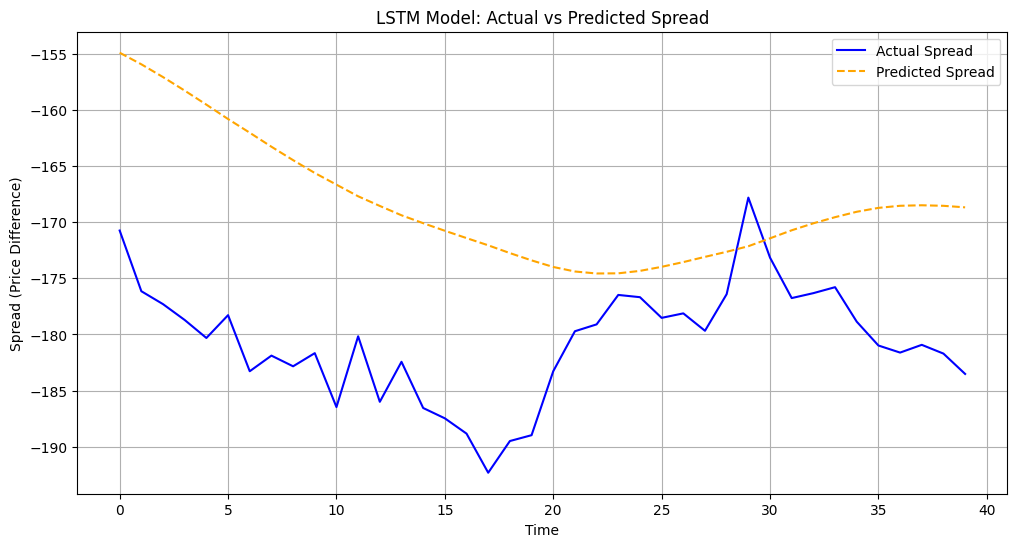

Mean Squared Error: 193.8306
Sharpe Ratio: 0.5340
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


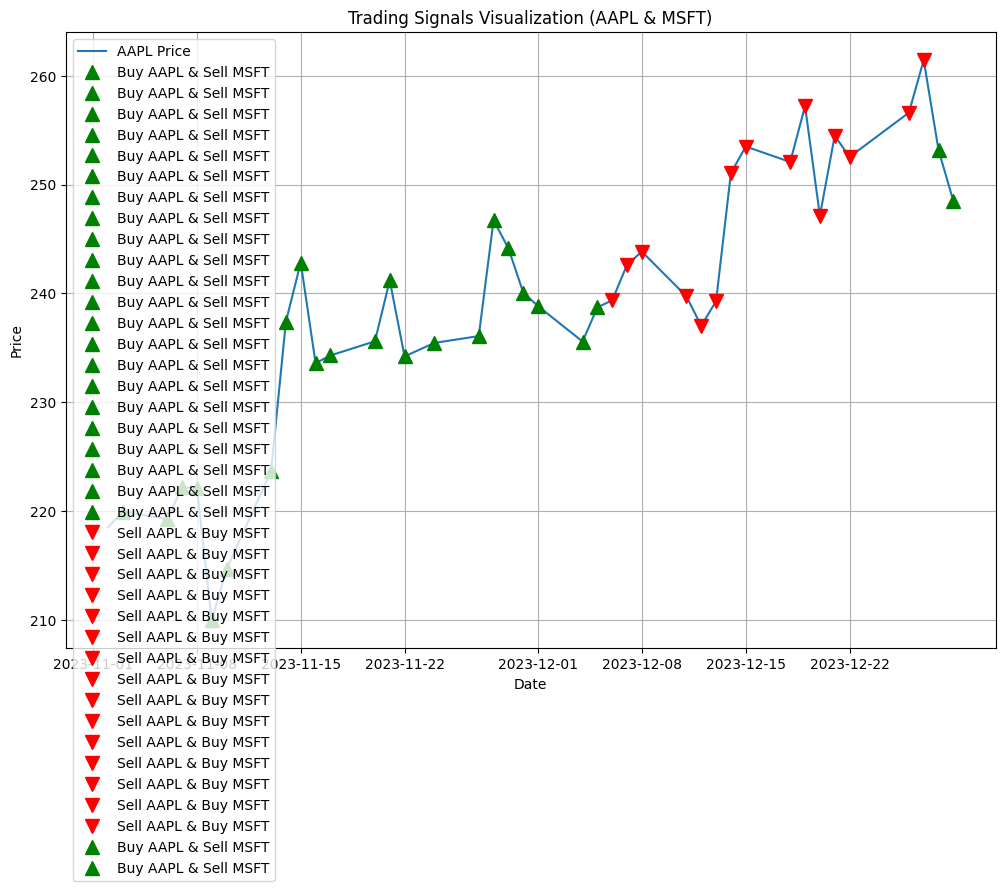

Trading signals plotted successfully based on favorable metrics.


In [107]:
# Example Usage
execute_trading_strategy(data_path='us_equities_data.parquet', ticker1='AAPL', ticker2='MSFT', sharpe_threshold=0.5)